In [8]:
import os, shutil



base_dir = './cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
original_dataset_dir = '../data/dogs-vs-cats/train'

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. /255)
test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 62s 616ms/step - loss: 0.6880 - acc: 0.5330 - val_loss: 0.6718 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 64s 640ms/step - loss: 0.6431 - acc: 0.6375 - val_loss: 0.6712 - val_acc: 0.5760
Epoch 3/30
100/100 [==============================] - 63s 628ms/step - loss: 0.5989 - acc: 0.6790 - val_loss: 0.6297 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 64s 636ms/step - loss: 0.5596 - acc: 0.7090 - val_loss: 0.5917 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 65s 646ms/step - loss: 0.5226 - acc: 0.7380 - val_loss: 0.5838 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 64s 637ms/step - loss: 0.4914 - acc: 0.7655 - val_loss: 0.5798 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 64s 639ms/step - loss: 0.4659 - acc: 0.7790 - val_loss: 0.6169 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 6

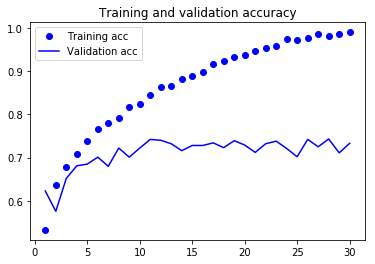

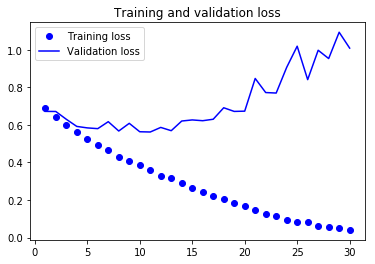

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
#データ拡張の実施

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
print(fname)
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

dog.1999.jpg


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. /255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 89s 891ms/step - loss: 0.6914 - acc: 0.5294 - val_loss: 0.6761 - val_acc: 0.5698
Epoch 2/100
100/100 [==============================] - 88s 880ms/step - loss: 0.6803 - acc: 0.5584 - val_loss: 0.6528 - val_acc: 0.6076
Epoch 3/100
100/100 [==============================] - 94s 938ms/step - loss: 0.6654 - acc: 0.5962 - val_loss: 0.6360 - val_acc: 0.6218
Epoch 4/100
100/100 [==============================] - 94s 937ms/step - loss: 0.6541 - acc: 0.6162 - val_loss: 0.6419 - val_acc: 0.6070
Epoch 5/100
100/100 [==============================] - 97s 972ms/step - loss: 0.6356 - acc: 0.6378 - val_loss: 0.6025 - val_acc: 0.6720
Epoch 6/100
100/100 [==============================] - 97s 969ms/step - loss: 0.6217 - acc: 0.6478 - val_loss: 0.6335 - val_acc: 0.6134
Epoch 7/100
100/100 [==============================] - 96s 962ms/step - loss: 0.6052 - acc: 0.6691 -

100/100 [==============================] - 95s 947ms/step - loss: 0.4233 - acc: 0.8012 - val_loss: 0.4654 - val_acc: 0.7925
Epoch 61/100
100/100 [==============================] - 99s 993ms/step - loss: 0.4237 - acc: 0.8081 - val_loss: 0.4281 - val_acc: 0.7990
Epoch 62/100
100/100 [==============================] - 97s 969ms/step - loss: 0.4051 - acc: 0.8169 - val_loss: 0.4561 - val_acc: 0.7754
Epoch 63/100
100/100 [==============================] - 96s 963ms/step - loss: 0.4266 - acc: 0.7984 - val_loss: 0.4469 - val_acc: 0.8061
Epoch 64/100
100/100 [==============================] - 96s 963ms/step - loss: 0.4020 - acc: 0.8163 - val_loss: 0.5099 - val_acc: 0.7777
Epoch 65/100
100/100 [==============================] - 97s 967ms/step - loss: 0.4099 - acc: 0.8106 - val_loss: 0.4311 - val_acc: 0.8084
Epoch 66/100
100/100 [==============================] - 99s 989ms/step - loss: 0.4013 - acc: 0.8200 - val_loss: 0.4853 - val_acc: 0.7945
Epoch 67/100
 23/100 [=====>........................] 

In [ ]:
model.save('cats_and_dogs_small_2.h5')